## <img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Nombre y Apellido

***
## Filtrado


<div class="alert alert-block alert-info">
<b>1)</b> Para el siguiente filtro digital se pide:

</div>

 $$ y(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(k-i)  $$
 
 Para N = [3; 5]

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./1a1_1.jpg" align="center" width="50%" /> 
<img src="./1a1_2.jpg" align="center" width="50%" /> 


   b) Corrobore su respuesta mediante la simulación computacional


In [1]:
## Inicialización del Notebook del TP4

import numpy as np
from pandas import DataFrame
from IPython.display import HTML
from scipy import signal as sig
from  matplotlib import patches
import matplotlib as mpl
import scipy.io as scipyio
import matplotlib.pyplot as plt
import scipy.fftpack as sc

#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

def vertical_flaten(a):
    
    return a.reshape(a.shape[0],1)

def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

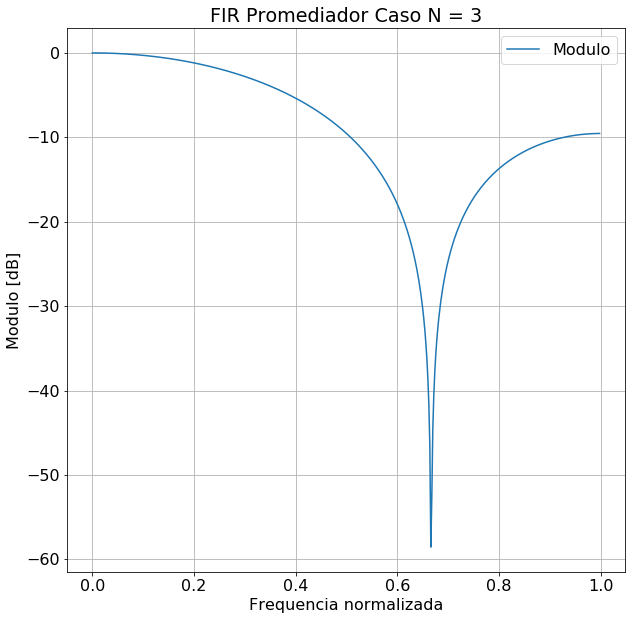

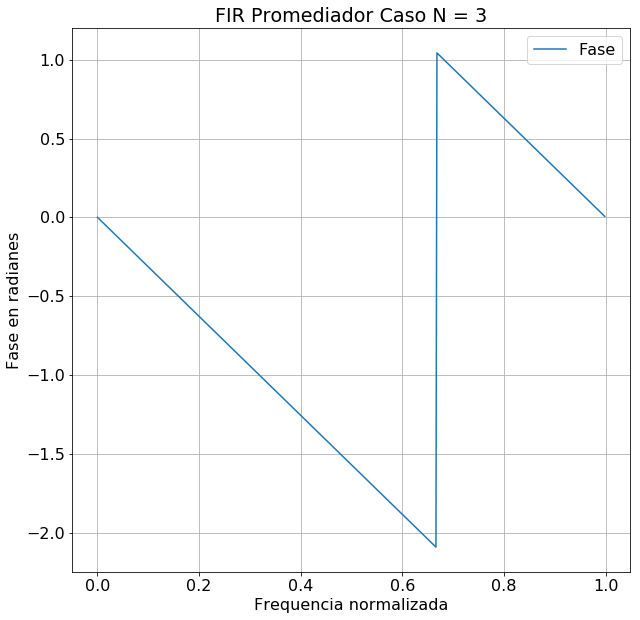

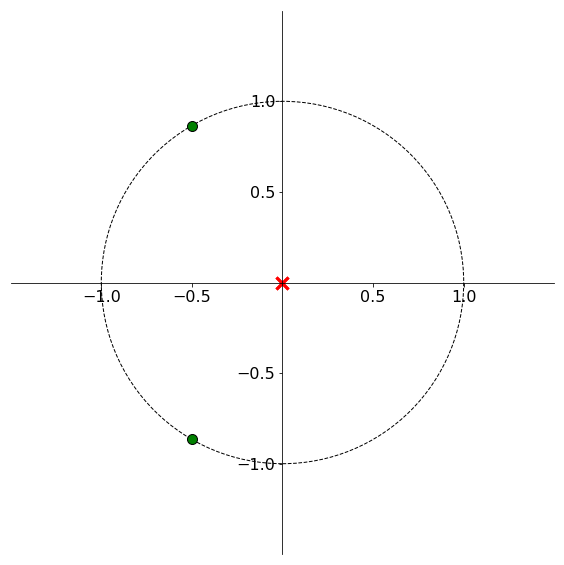

(array([-0.5+0.8660254j, -0.5-0.8660254j]), array([0., 0.]), 1.0)

In [15]:
ww, hh = sig.freqz(np.array([1/3, 1/3, 1/3]), 1)
ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)), label='Modulo')

plt.title('FIR Promediador Caso N = 3')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh), label='Fase')

plt.title('FIR Promediador Caso N = 3')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(3)
a = [1/3, 1/3, 1/3]
b = [1, 0, 0]

zplane(a, b)

a) El diagrama de polos y ceros y su respuesta de módulo y fase

<img src="./1a2_1.jpg" align="center" width="50%" /> 
<img src="./1a2_2.jpg" align="center" width="50%" /> 

   b) Corrobore su respuesta mediante simulación computacional

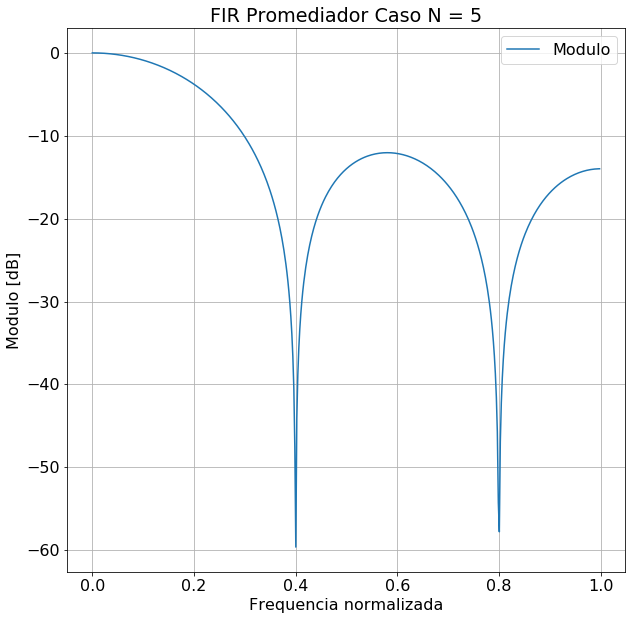

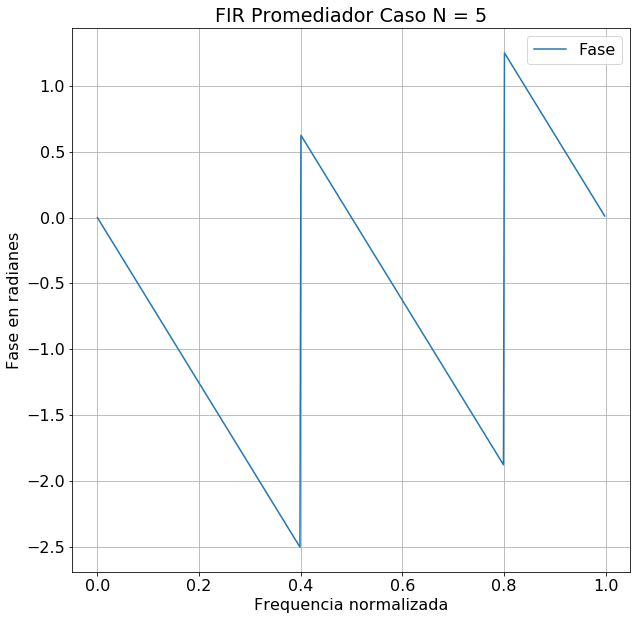

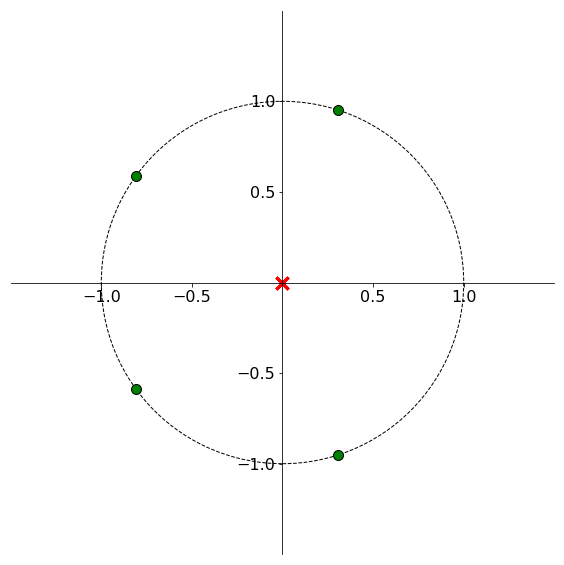

(array([ 0.30901699+0.95105652j,  0.30901699-0.95105652j,
        -0.80901699+0.58778525j, -0.80901699-0.58778525j]),
 array([0., 0., 0., 0.]),
 1.0)

In [17]:
ww, hh = sig.freqz(np.array([1/5, 1/5, 1/5, 1/5, 1/5]), 1)
ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)), label='Modulo')

plt.title('FIR Promediador Caso N = 5')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh), label='Fase')

plt.title('FIR Promediador Caso N = 5')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(3)
a = [1/5, 1/5, 1/5, 1/5, 1/5]
b = [1, 0, 0, 0, 0]

zplane(a, b)

<div class="alert alert-block alert-info">
<b>2)</b> Para el siguiente filtro digital se pide:

</div>


$$ h(k) = (-1, 1) $$
 


   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./2a.jpg" align="center" width="50%" /> 


   b) Corrobore su respuesta mediante simulación computacional


C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


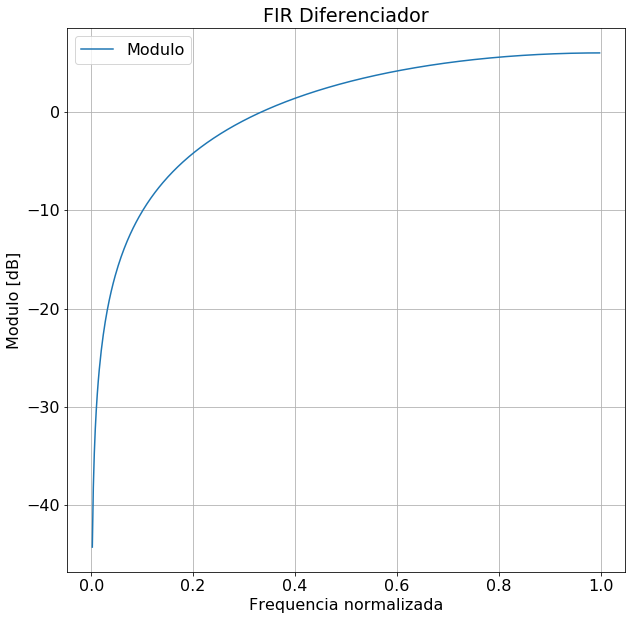

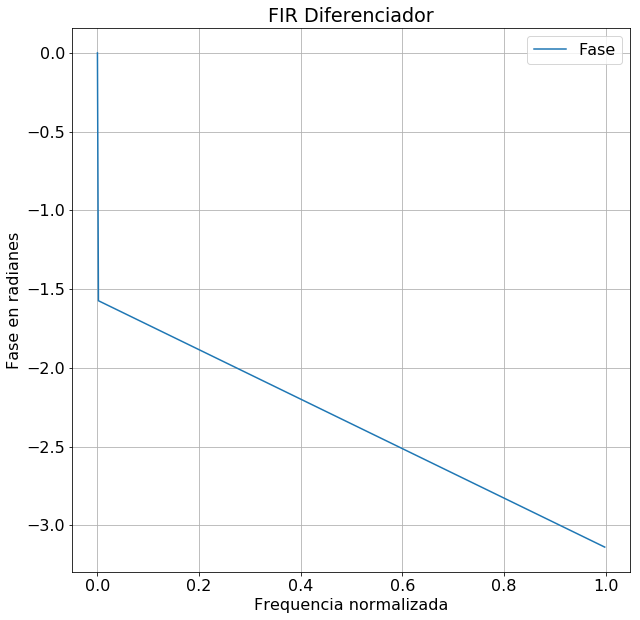

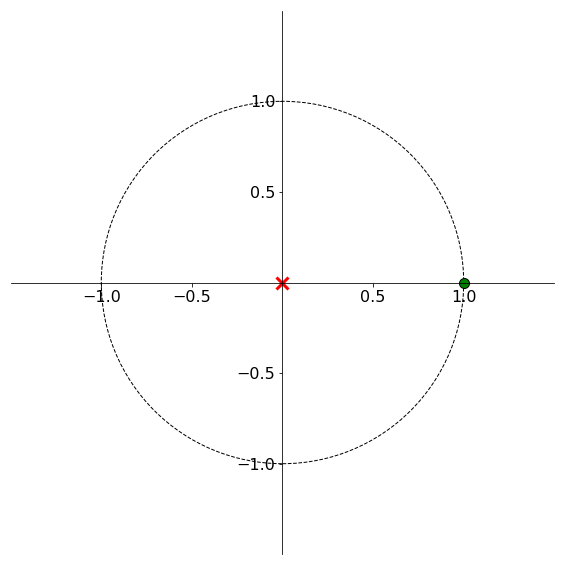

(array([1.]), array([0.]), 1.0)

In [18]:
ww, hh = sig.freqz(np.array([-1, 1]), 1)
ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)), label='Modulo')

plt.title('FIR Diferenciador')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh), label='Fase')

plt.title('FIR Diferenciador')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(3)
a = [-1, 1]
b = [1, 0]

zplane(a, b)

<div class="alert alert-block alert-info">
<b>3)</b> Para el siguiente filtro digital se pide:

</div>


<img src="./comb.png" align="center" width="30%" /> 


Para $N= (2; 4)$ y $b = -1$

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./3a1.jpg" align="center" width="50%" /> 



   b) Corrobore su respuesta mediante simulación computacional


C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


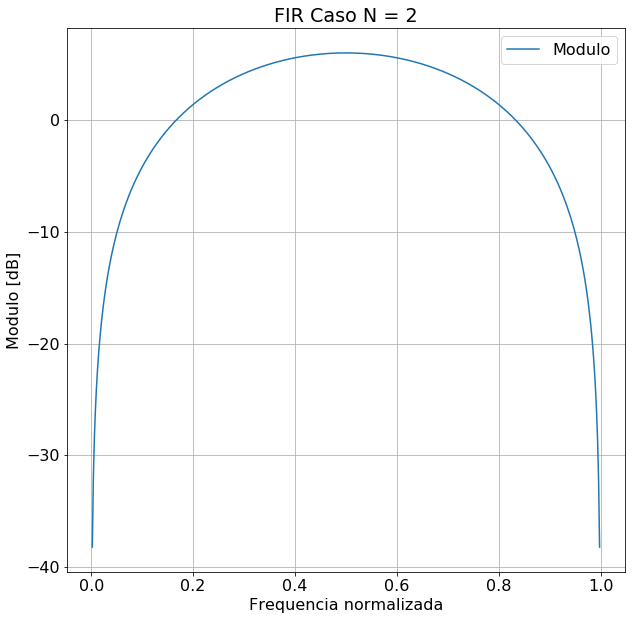

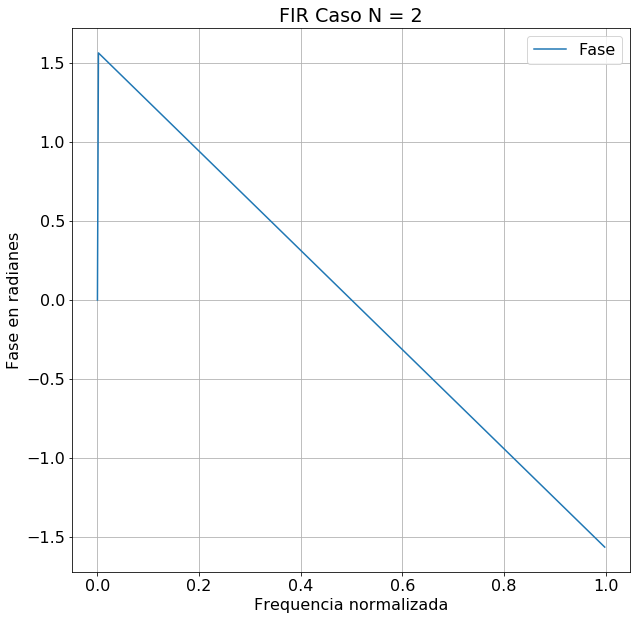

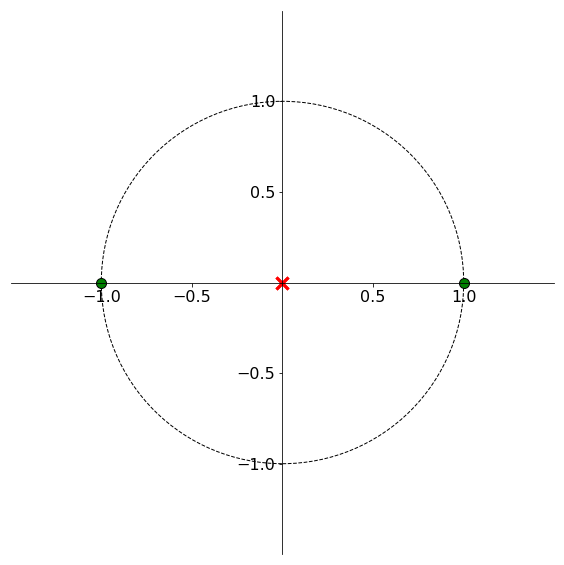

(array([ 1., -1.]), array([0., 0.]), 1.0)

In [19]:
ww, hh = sig.freqz(np.array([1, 0, -1]), 1)
ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)), label='Modulo')

plt.title('FIR Caso N = 2')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh), label='Fase')

plt.title('FIR Caso N = 2')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(3)
a = [1, 0, -1]
b = [1, 0, 0]

zplane(a, b)

   a) El diagrama de polos y ceros y su respuesta de módulo y fase

<img src="./3a2.jpg" align="center" width="50%" /> 

   b) Corrobore su respuesta mediante simulación computacional

C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


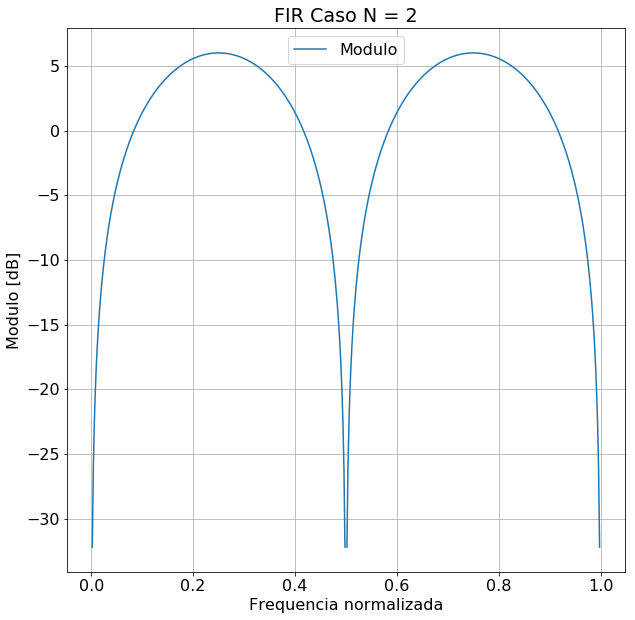

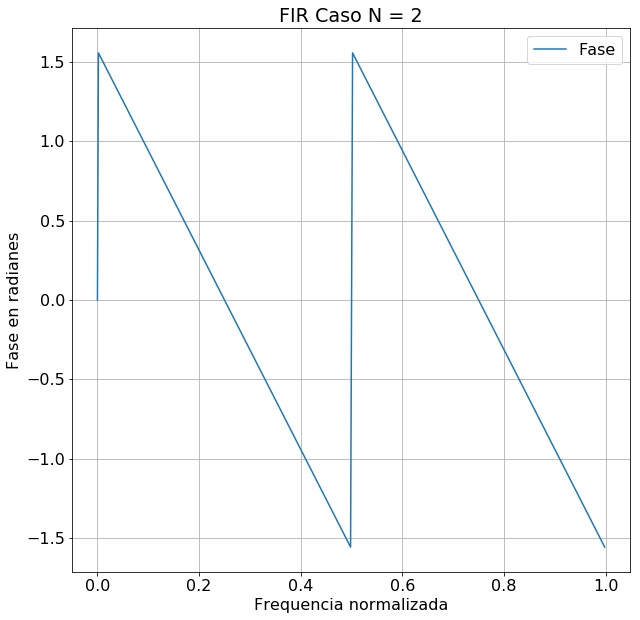

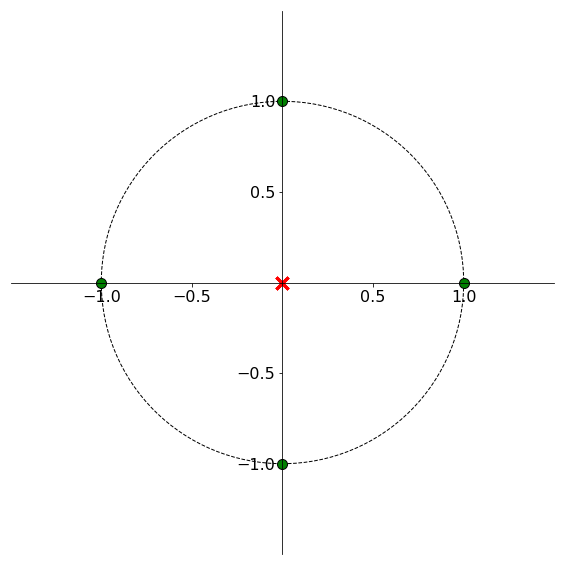

(array([-1.00000000e+00+0.j,  8.32667268e-17+1.j,  8.32667268e-17-1.j,
         1.00000000e+00+0.j]), array([0., 0., 0., 0.]), 1.0)

In [20]:
ww, hh = sig.freqz(np.array([1, 0, 0, 0, -1]), 1)
ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)), label='Modulo')

plt.title('FIR Caso N = 2')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh), label='Fase')

plt.title('FIR Caso N = 2')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(3)
a = [1, 0, 0, 0, -1]
b = [1, 0, 0, 0, 0]

zplane(a, b)

<div class="alert alert-block alert-info">
<b>4)</b> En el archivo <i>ECG_TP4.mat</i> encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Diseñe y aplique los filtros digitales necesarios para mitigar las siguientes fuentes de contaminación:
</div>

 - Ruido causado por el movimiento de los electrodos (Alta frecuencia)
 - Ruido muscular (Alta frecuencia)
 - Movimiento de la línea de base del ECG, inducido en parte por la respiración (Baja frecuencia)
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Los latidos presentes en el registro de ECG, alineados y clasificados (de origen normal y ventricular) poseen las siguientes características temporales y frecuenciales:
</div>


<img src="./latidos_tiempo.png" align="center" width="80%" /> 

<img src="./latido_promedio.png" align="center" width="80%" /> 

<img src="./latidos_espectro.png" align="center" width="80%" /> 


### Archivo *ECG_TP4.mat*
(variables)
 - **ecg_lead**: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 - **qrs_detections**: vector con las localizaciones (en # de muestras) donde ocurren los latidos
 
a) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a *suavidad* de los trazos y nivel isoeléctrico nulo.
 

En primera instancia analizamos la señal ECG y su espectro en las primeras 10000muestras(10 segundos de muestreo), 
donde existe poca contaminacion, con el objetivo de encontrar "pulsos patron" y detectar las frecuencias de corte 
de los filtros a aplicar 

In [3]:
mat = scipyio.loadmat('ECG_TP4.mat')

ecg_lead = mat['ecg_lead']  
qrs_pattern1 = mat['qrs_pattern1']
heartbeat_pattern1 = mat['heartbeat_pattern1']
heartbeat_pattern2 = mat['heartbeat_pattern2']
qrs_detections = mat['qrs_detections']

C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\alvma\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


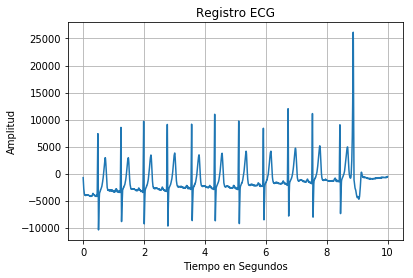

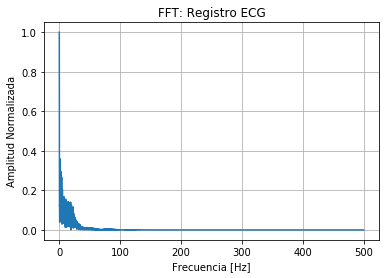

In [4]:
fs = 1000 #1KHz
ts = 1/fs

ecg_N = 10000 #Tomamos 10000 muestras, es decir los primeros 10 segundos que se encuentran poco contaminados
N = len(ecg_lead[:ecg_N])
tt = np.linspace(0.0, (N-1)*ts, N)

plt.figure(1)

plt.plot(tt, ecg_lead[:ecg_N])

plt.title('Registro ECG')
plt.xlabel('Tiempo en Segundos')
plt.ylabel('Amplitud')
plt.grid(which='both', axis='both')


ff = np.linspace(0.0, fs/2, N/2)

spectrum = np.abs(sc.fft(ecg_lead[:ecg_N], axis=0))
spectrum = (1/max(spectrum))*spectrum
halfSpectrum = spectrum[:N//2] 

plt.figure(2)

plt.plot(ff, halfSpectrum)

plt.title('FFT: Registro ECG')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud Normalizada')
plt.grid(which='both', axis='both')

Como el grafico anterior es poco representativo, realizamos el mismo grafico con un mayor zoom, entre los 0 y 100Hz y entre los 0 y 50Hz:

C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


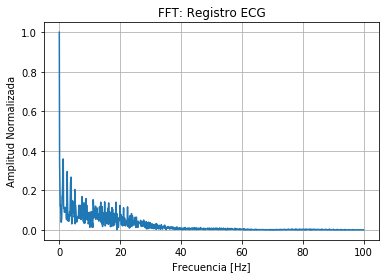

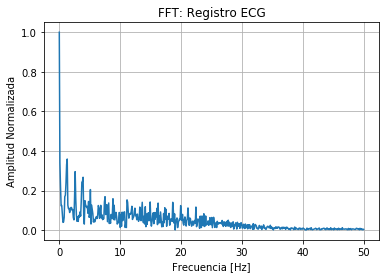

In [11]:
ff = np.linspace(0.0, fs/10, N/10)

spectrum = np.abs(sc.fft(ecg_lead[:ecg_N], axis=0))
spectrum = (1/max(spectrum))*spectrum
halfSpectrum = spectrum[:N//2] 

plt.figure(1)

plt.plot(ff, halfSpectrum[:N//10])

plt.title('FFT: Registro ECG')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud Normalizada')
plt.grid(which='both', axis='both')

ff = np.linspace(0.0, fs/20, N/20)

spectrum = np.abs(sc.fft(ecg_lead[:ecg_N], axis=0))
spectrum = (1/max(spectrum))*spectrum
halfSpectrum = spectrum[:N//2] 

plt.figure(2)

plt.plot(ff, halfSpectrum[:N//20])

plt.title('FFT: Registro ECG')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud Normalizada')
plt.grid(which='both', axis='both')

Graficamos la variable que representa un complejo de ondas QRS patron del archivo .mat:

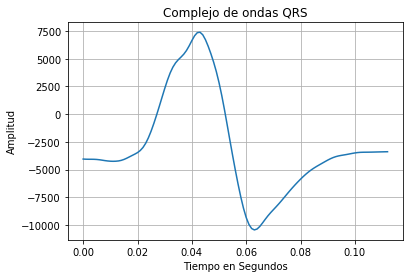

In [31]:
N = len(qrs_pattern1)
tt = np.linspace(0.0, (N-1)*ts, N).flatten()

plt.figure(1)

plt.plot(tt, qrs_pattern1)

plt.title('Complejo de ondas QRS')
plt.xlabel('Tiempo en Segundos')
plt.ylabel('Amplitud')
plt.grid(which='both', axis='both')

Graficamos latidos promedios y sus espectros:

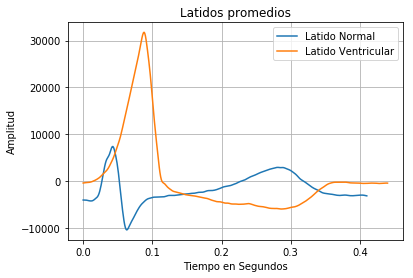

In [32]:
N = len(heartbeat_pattern1)
tt = np.linspace(0, (N-1)*ts, N).flatten()

plt.figure(1)

plt.plot(tt, heartbeat_pattern1, label='Latido Normal')


N = len(heartbeat_pattern2)
tt = np.linspace(0.0, (N-1)*ts, N).flatten()

plt.plot(tt, heartbeat_pattern2, label='Latido Ventricular')

plt.title('Latidos promedios')
plt.xlabel('Tiempo en Segundos')
plt.ylabel('Amplitud')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


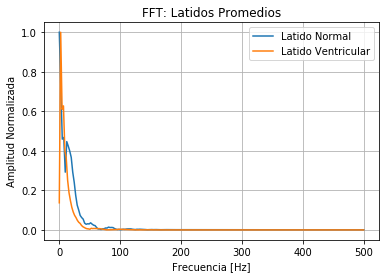

In [13]:
plt.figure(1)

N = len(heartbeat_pattern1)
tt = np.linspace(0.0, (N-1)*ts, N).flatten()
ff = np.linspace(0.0, fs/2, N/2).flatten()

spectrum = np.abs(sc.fft(heartbeat_pattern1,axis=0))
spectrum = (1/max(spectrum))*spectrum
halfSpectrum = spectrum[:N//2] 

plt.plot(ff, halfSpectrum, label='Latido Normal')

N = len(heartbeat_pattern2)
tt = np.linspace(0.0, (N-1)*ts, N).flatten()
ff = np.linspace(0.0, fs/2, N/2).flatten()

spectrum = np.abs(sc.fft(heartbeat_pattern2,axis=0))
spectrum = (1/max(spectrum))*spectrum
halfSpectrum = spectrum[:N//2] 

plt.plot(ff, halfSpectrum, label='Latido Ventricular')
axes_hdl = plt.gca()
axes_hdl.legend()

plt.title('FFT: Latidos Promedios')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud Normalizada')
plt.grid(which='both', axis='both')


b) ¿Cómo obtuvo dichos valores? 
 

In [ ]:
# Defina la plantilla del filtro

fs0 = 0.5 # fin de la banda de detenida 0
fc0 = 2 # comienzo de la banda de paso
fc1 = 40 # fin de la banda de paso
fs1 = 45 # comienzo de la banda de detenida 1

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Partiendo de la base que un electrocardiograma es la medicion y representacion grafica de la actividad electrica del corazon, con un ancho de banda entre los 0.5z y 100Hz, de que existen perturbaciones en esta señal electrocardiografica, como pueden ser interferencia de la linea de alimentacion, entorno a los 50Hz, ruido por perdida de contacto o movmiento de los electrodos, que puede ser permanente o intermitente, contraccion muscular, con ancho de banda que se solapa con el del ECG, desplazamiento de linea de base por efecto de la respiracion, que resulta de muy baja frecuencia(hasta 0,5Hz) y ruido electro-quirurgico que suele estar por encima de los 100Hz, y del analisis del espectro del ECG provisto, se llego a la conclusion que se debe filtrar con un pasa altos con frecuencia de corte en 0.5Hz y comienzo de banda de paso en 2Hz, y con un filtro pasa bajos con fin de la banda de paso en 40Hz y comienzo de la banda de detenida en 45Hz(debido a la deriva de la frecuencia de la alimentacion de red). En todos los casos el desvio maximo admisible de la banda de paso es 0.1dB
</div>

c) Diseñe **al menos** dos filtros FIR y dos IIR para su comparación. Verifique que la respuesta en frecuencia responda a la plantilla de diseño
  

No handles with labels found to put in legend.


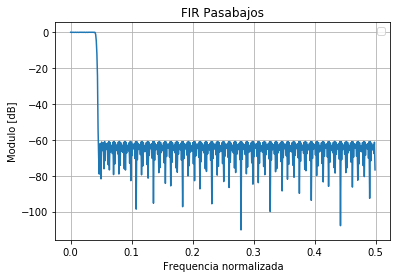

No handles with labels found to put in legend.


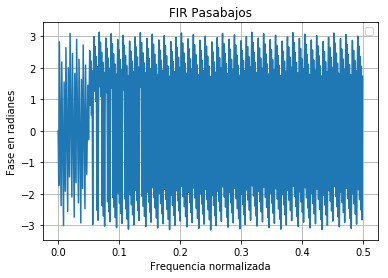

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
data = np.load('PB_FIR_EQUIRIPPLE.npz')
h_pb_fir = data['ba']
b_pb_fir = h_pb_fir[0]
a_pb_fir = h_pb_fir[1]

ww, hh = sig.freqz(b_pb_fir, a_pb_fir)
ww = (ww / np.pi) / 2

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)))

plt.title('FIR Pasabajos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh))

plt.title('FIR Pasabajos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()



C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
No handles with labels found to put in legend.


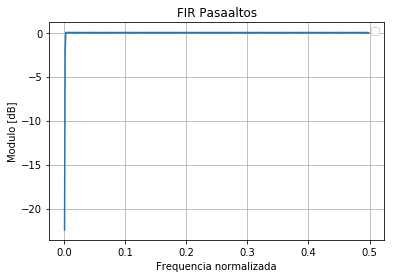

No handles with labels found to put in legend.


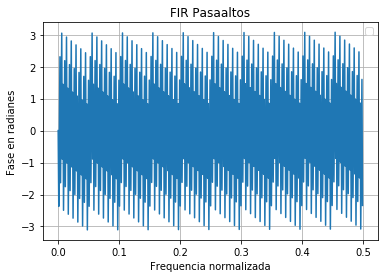

In [20]:
data = np.load('PA_FIR_EQUIRIPPLE.npz')
h_pa_fir = data['ba']
b_pa_fir = h_pa_fir[0]
a_pa_fir = h_pa_fir[1]

ww, hh = sig.freqz(b_pa_fir, a_pa_fir)
ww = (ww / np.pi) / 2

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)))

plt.title('FIR Pasaaltos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh))

plt.title('FIR Pasaaltos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

No handles with labels found to put in legend.


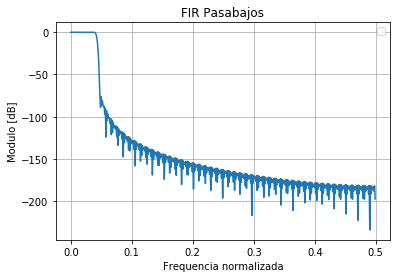

No handles with labels found to put in legend.


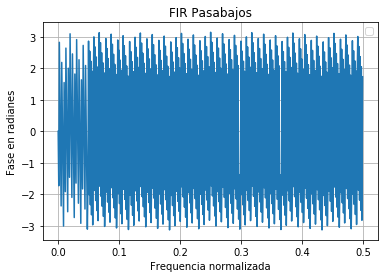

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [50]:
data = np.load('PB_FIR_BLACKMAN.npz')
h_pb_fir = data['ba']
b_pb_fir = h_pb_fir[0]
a_pb_fir = h_pb_fir[1]

ww, hh = sig.freqz(b_pb_fir, a_pb_fir)
ww = (ww / np.pi) / 2

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)))

plt.title('FIR Pasabajos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh))

plt.title('FIR Pasabajos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(3)

No handles with labels found to put in legend.


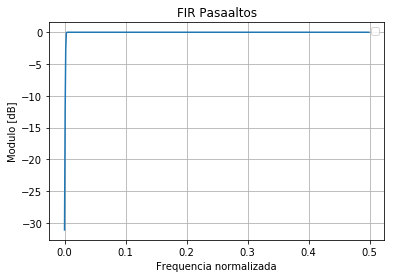

No handles with labels found to put in legend.


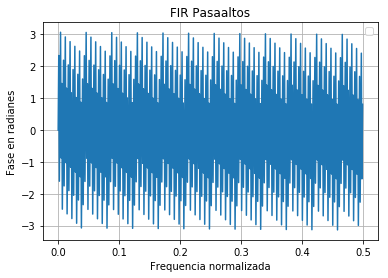

In [49]:
data = np.load('PA_FIR_BLACKMAN.npz')
h_pa_fir = data['ba']
b_pa_fir = h_pa_fir[0]
a_pa_fir = h_pa_fir[1]

ww, hh = sig.freqz(b_pa_fir, a_pa_fir)
ww = (ww / np.pi) / 2

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)))

plt.title('FIR Pasaaltos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh))

plt.title('FIR Pasaaltos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

No handles with labels found to put in legend.


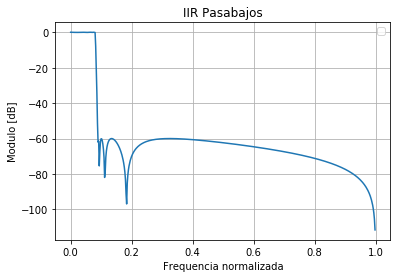

No handles with labels found to put in legend.


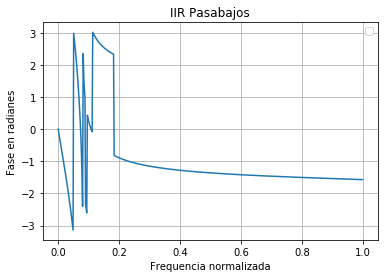

In [23]:
data = np.load('PB_IIR_ELIPTIC.npz')
h_pb_iir = data['ba']
b_pb_iir = h_pb_iir[0]
a_pb_iir = h_pb_iir[1]

ww, hh = sig.freqz(b_pb_iir, a_pb_iir)
ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)))

plt.title('IIR Pasabajos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh))

plt.title('IIR Pasabajos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

No handles with labels found to put in legend.


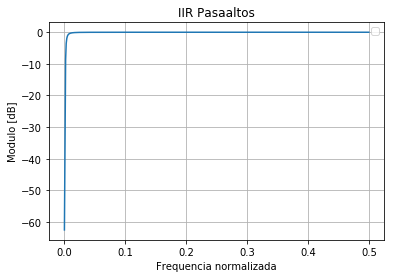

No handles with labels found to put in legend.


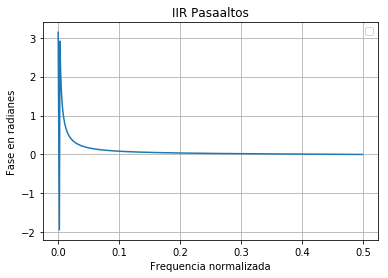

In [24]:
data = np.load('PA_IIR_BESSEL.npz')
h_pa_iir = data['ba']
b_pa_iir = h_pa_iir[0]
a_pa_iir = h_pa_iir[1]

ww, hh = sig.freqz(b_pa_iir, a_pa_iir)
ww = (ww / np.pi) / 2

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)))

plt.title('IIR Pasaaltos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh))

plt.title('IIR Pasaaltos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

No handles with labels found to put in legend.


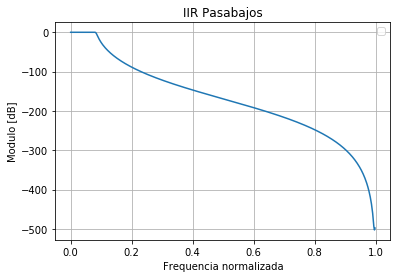

No handles with labels found to put in legend.


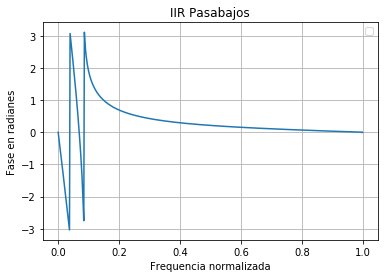

In [25]:
data = np.load('PB_IIR_CHEVYCHEV_1.npz')
h_pb_iir = data['ba']
b_pb_iir = h_pb_iir[0]
a_pb_iir = h_pb_iir[1]


ww, hh = sig.freqz(b_pb_iir, a_pb_iir)
ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)))

plt.title('IIR Pasabajos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh))

plt.title('IIR Pasabajos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

No handles with labels found to put in legend.


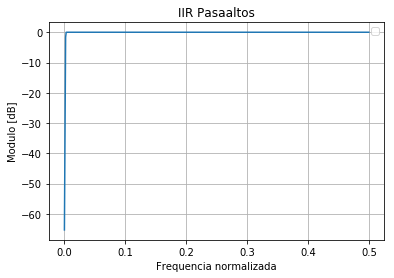

No handles with labels found to put in legend.


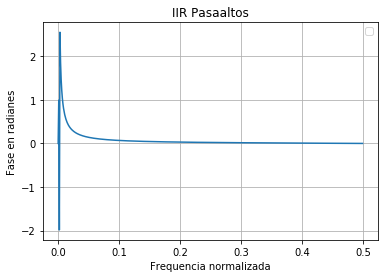

In [26]:
data = np.load('PA_IIR_BUTTERWORTH.npz')
h_pa_iir = data['ba']
b_pa_iir = h_pa_iir[0]
a_pa_iir = h_pa_iir[1]

ww, hh = sig.freqz(b_pa_iir, a_pa_iir)
ww = (ww / np.pi) / 2

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)))

plt.title('IIR Pasaaltos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

plt.figure(2)

plt.plot(ww, np.angle(hh))

plt.title('IIR Pasaaltos')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

d) Evalúe el rendimiento de los filtros que haya diseñado: 

 1. Verifique que filtra las señales interferentes
 2. Verifique que es inocuo en las zonas donde no hay interferentes



In [29]:
fs = 1000 #1KHz
ts = 1/fs

zonas_con_interf_baja_frec = ( 
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )


C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


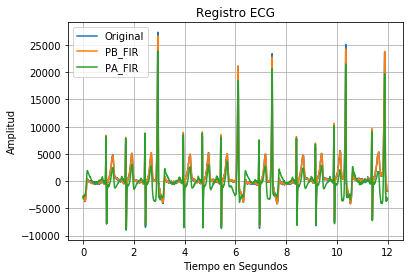

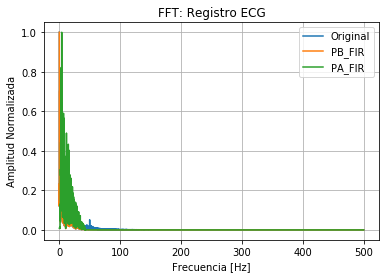

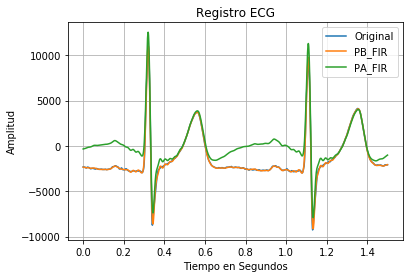

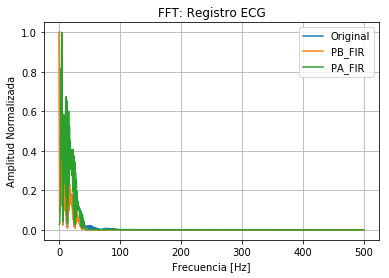

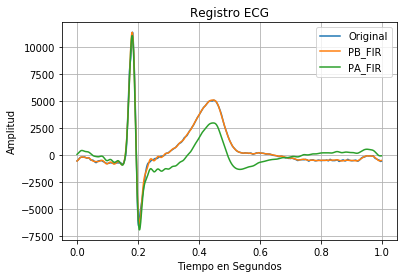

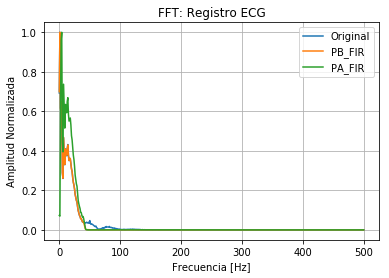

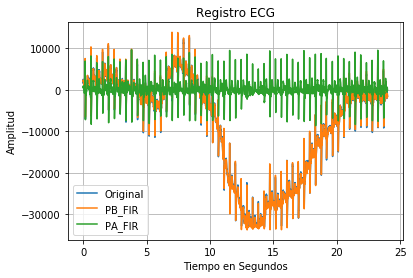

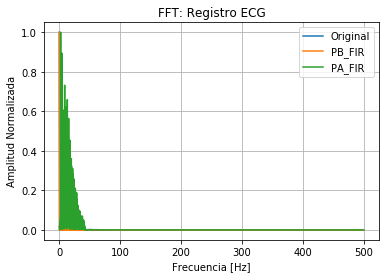

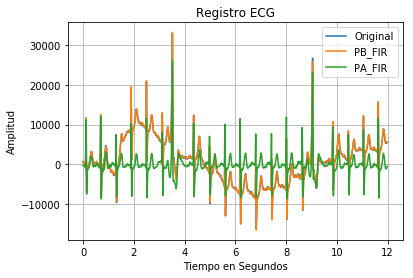

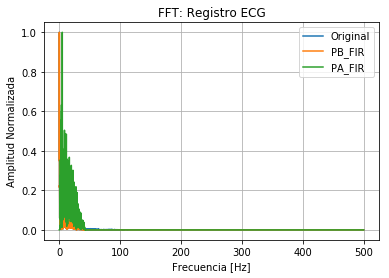

In [41]:
data = np.load('PB_FIR_EQUIRIPPLE.npz')
h_pb_fir = data['ba']
b_pb_fir = h_pb_fir[0]
a_pb_fir = h_pb_fir[1]
data = np.load('PA_FIR_EQUIRIPPLE.npz')
h_pa_fir = data['ba']
b_pa_fir = h_pa_fir[0]
a_pa_fir = h_pa_fir[1]

for i in range(3):
    ecg_In = int(zonas_sin_interf[i][0])
    ecg_Fin = int(zonas_sin_interf[i][1]) 
    N = len(ecg_lead[ecg_In:ecg_Fin])
    tt = np.linspace(0, (N-1)*ts, N).flatten()

    yPBFIR = sig.filtfilt(b_pb_fir,a_pb_fir,ecg_lead.flatten())

    yPAFIR = sig.filtfilt(b_pa_fir,a_pa_fir,yPBFIR.flatten())

    plt.figure(i + 1)
    plt.plot(tt, ecg_lead[ecg_In:ecg_Fin],label="Original")
    plt.plot(tt, yPBFIR[ecg_In:ecg_Fin], label="PB_FIR")
    plt.plot(tt, yPAFIR[ecg_In:ecg_Fin], label="PA_FIR")
    plt.title('Registro ECG')
    plt.xlabel('Tiempo en Segundos')
    plt.ylabel('Amplitud')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

    ff = np.linspace(0.0, fs/2, N/2).flatten()

    spectrum = np.abs(sc.fft(ecg_lead[ecg_In:ecg_Fin], axis=0))
    spectrum = (1/max(spectrum))*spectrum
    halfSpectrum = spectrum[:N//2] 

    spectrumYPBFIR = np.abs(sc.fft(yPBFIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPBFIR = (1/max(spectrumYPBFIR))*spectrumYPBFIR
    halfSpectrumYPBFIR = spectrumYPBFIR[:N//2] 

    spectrumYPAFIR = np.abs(sc.fft(yPAFIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPAFIR = (1/max(spectrumYPAFIR))*spectrumYPAFIR
    halfSpectrumYPAFIR = spectrumYPAFIR[:N//2] 

    plt.figure(i + 4)

    plt.plot(ff, halfSpectrum, label="Original")
    plt.plot(ff, halfSpectrumYPBFIR, label="PB_FIR")
    plt.plot(ff, halfSpectrumYPAFIR, label="PA_FIR")

    plt.title('FFT: Registro ECG')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud Normalizada')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()
    
for i in range(2):
    ecg_In = int(zonas_con_interf_baja_frec[i][0])
    ecg_Fin = int(zonas_con_interf_baja_frec[i][1]) #len(ecg_lead)
    N = len(ecg_lead[ecg_In:ecg_Fin])
    tt = np.linspace(0, (N-1)*ts, N).flatten()

    yPBFIR = sig.filtfilt(b_pb_fir,a_pb_fir,ecg_lead.flatten())

    yPAFIR = sig.filtfilt(b_pa_fir,a_pa_fir,yPBFIR.flatten())

    plt.figure(i + 7)
    plt.plot(tt, ecg_lead[ecg_In:ecg_Fin],label="Original")
    plt.plot(tt, yPBFIR[ecg_In:ecg_Fin], label="PB_FIR")
    plt.plot(tt, yPAFIR[ecg_In:ecg_Fin], label="PA_FIR")
    plt.title('Registro ECG')
    plt.xlabel('Tiempo en Segundos')
    plt.ylabel('Amplitud')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

    ff = np.linspace(0.0, fs/2, N/2).flatten()

    spectrum = np.abs(sc.fft(ecg_lead[ecg_In:ecg_Fin], axis=0))
    spectrum = (1/max(spectrum))*spectrum
    halfSpectrum = spectrum[:N//2] 

    spectrumYPBFIR = np.abs(sc.fft(yPBFIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPBFIR = (1/max(spectrumYPBFIR))*spectrumYPBFIR
    halfSpectrumYPBFIR = spectrumYPBFIR[:N//2] 

    spectrumYPAFIR = np.abs(sc.fft(yPAFIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPAFIR = (1/max(spectrumYPAFIR))*spectrumYPAFIR
    halfSpectrumYPAFIR = spectrumYPAFIR[:N//2] 

    plt.figure(i + 9)

    plt.plot(ff, halfSpectrum, label="Original")
    plt.plot(ff, halfSpectrumYPBFIR, label="PB_FIR")
    plt.plot(ff, halfSpectrumYPAFIR, label="PA_FIR")

    plt.title('FFT: Registro ECG')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud Normalizada')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


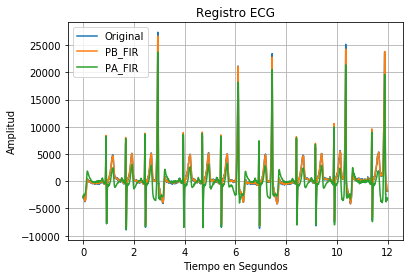

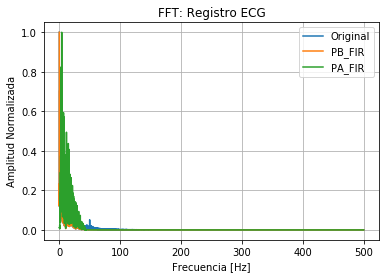

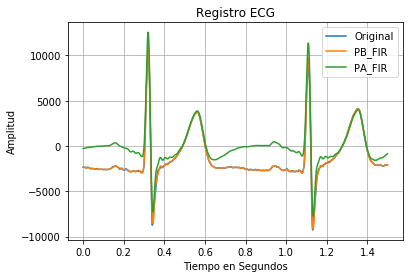

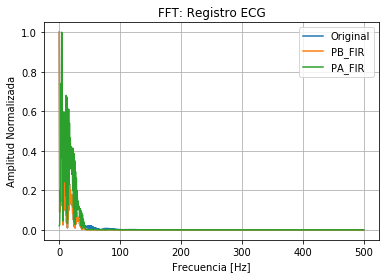

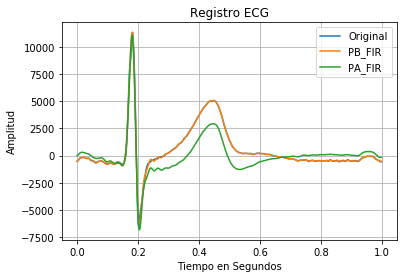

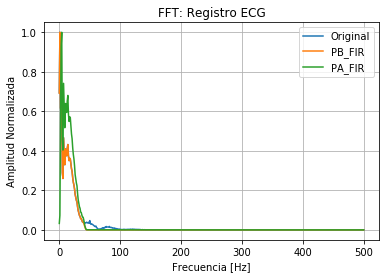

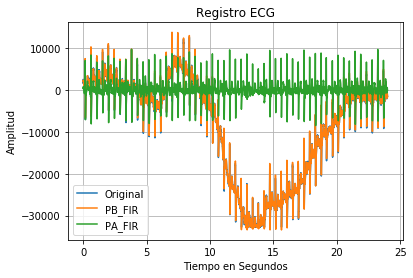

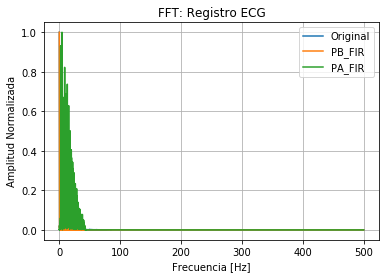

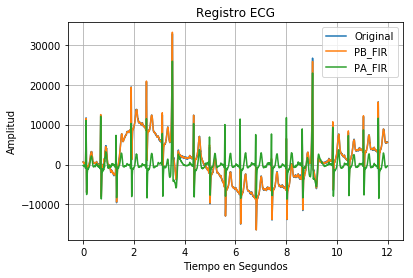

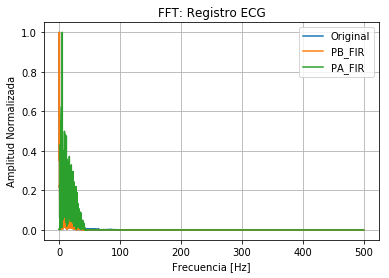

In [48]:
data = np.load('PB_FIR_BLACKMAN.npz')
h_pb_fir = data['ba']
b_pb_fir = h_pb_fir[0]
a_pb_fir = h_pb_fir[1]
data = np.load('PA_FIR_BLACKMAN.npz')
h_pa_fir = data['ba']
b_pa_fir = h_pa_fir[0]
a_pa_fir = h_pa_fir[1]

for i in range(3):
    ecg_In = int(zonas_sin_interf[i][0])
    ecg_Fin = int(zonas_sin_interf[i][1]) 
    N = len(ecg_lead[ecg_In:ecg_Fin])
    tt = np.linspace(0, (N-1)*ts, N).flatten()

    yPBFIR = sig.filtfilt(b_pb_fir,a_pb_fir,ecg_lead.flatten())

    yPAFIR = sig.filtfilt(b_pa_fir,a_pa_fir,yPBFIR.flatten())

    plt.figure(i + 1)
    plt.plot(tt, ecg_lead[ecg_In:ecg_Fin],label="Original")
    plt.plot(tt, yPBFIR[ecg_In:ecg_Fin], label="PB_FIR")
    plt.plot(tt, yPAFIR[ecg_In:ecg_Fin], label="PA_FIR")
    plt.title('Registro ECG')
    plt.xlabel('Tiempo en Segundos')
    plt.ylabel('Amplitud')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

    ff = np.linspace(0.0, fs/2, N/2).flatten()

    spectrum = np.abs(sc.fft(ecg_lead[ecg_In:ecg_Fin], axis=0))
    spectrum = (1/max(spectrum))*spectrum
    halfSpectrum = spectrum[:N//2] 

    spectrumYPBFIR = np.abs(sc.fft(yPBFIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPBFIR = (1/max(spectrumYPBFIR))*spectrumYPBFIR
    halfSpectrumYPBFIR = spectrumYPBFIR[:N//2] 

    spectrumYPAFIR = np.abs(sc.fft(yPAFIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPAFIR = (1/max(spectrumYPAFIR))*spectrumYPAFIR
    halfSpectrumYPAFIR = spectrumYPAFIR[:N//2] 

    plt.figure(i + 4)

    plt.plot(ff, halfSpectrum, label="Original")
    plt.plot(ff, halfSpectrumYPBFIR, label="PB_FIR")
    plt.plot(ff, halfSpectrumYPAFIR, label="PA_FIR")

    plt.title('FFT: Registro ECG')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud Normalizada')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()
    
for i in range(2):
    ecg_In = int(zonas_con_interf_baja_frec[i][0])
    ecg_Fin = int(zonas_con_interf_baja_frec[i][1]) #len(ecg_lead)
    N = len(ecg_lead[ecg_In:ecg_Fin])
    tt = np.linspace(0, (N-1)*ts, N).flatten()

    yPBFIR = sig.filtfilt(b_pb_fir,a_pb_fir,ecg_lead.flatten())

    yPAFIR = sig.filtfilt(b_pa_fir,a_pa_fir,yPBFIR.flatten())

    plt.figure(i + 7)
    plt.plot(tt, ecg_lead[ecg_In:ecg_Fin],label="Original")
    plt.plot(tt, yPBFIR[ecg_In:ecg_Fin], label="PB_FIR")
    plt.plot(tt, yPAFIR[ecg_In:ecg_Fin], label="PA_FIR")
    plt.title('Registro ECG')
    plt.xlabel('Tiempo en Segundos')
    plt.ylabel('Amplitud')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

    ff = np.linspace(0.0, fs/2, N/2).flatten()

    spectrum = np.abs(sc.fft(ecg_lead[ecg_In:ecg_Fin], axis=0))
    spectrum = (1/max(spectrum))*spectrum
    halfSpectrum = spectrum[:N//2] 

    spectrumYPBFIR = np.abs(sc.fft(yPBFIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPBFIR = (1/max(spectrumYPBFIR))*spectrumYPBFIR
    halfSpectrumYPBFIR = spectrumYPBFIR[:N//2] 

    spectrumYPAFIR = np.abs(sc.fft(yPAFIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPAFIR = (1/max(spectrumYPAFIR))*spectrumYPAFIR
    halfSpectrumYPAFIR = spectrumYPAFIR[:N//2] 

    plt.figure(i + 9)

    plt.plot(ff, halfSpectrum, label="Original")
    plt.plot(ff, halfSpectrumYPBFIR, label="PB_FIR")
    plt.plot(ff, halfSpectrumYPAFIR, label="PA_FIR")

    plt.title('FFT: Registro ECG')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud Normalizada')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


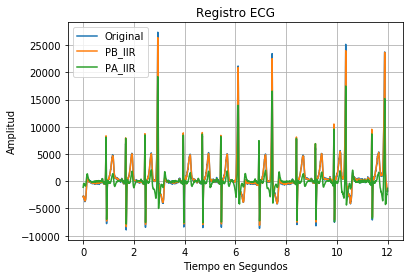

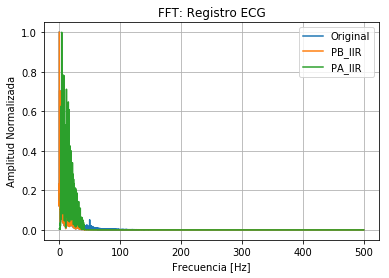

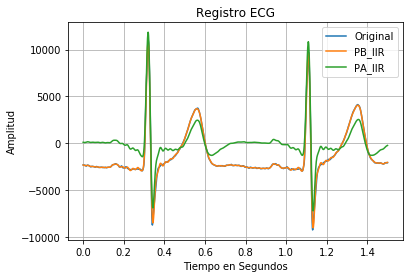

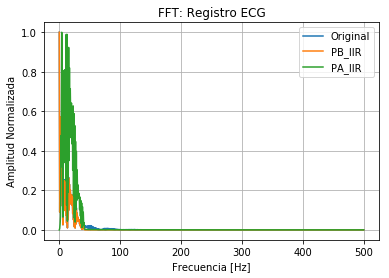

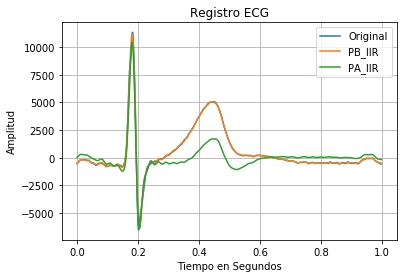

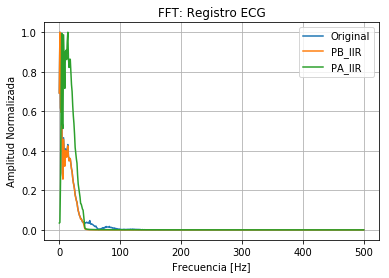

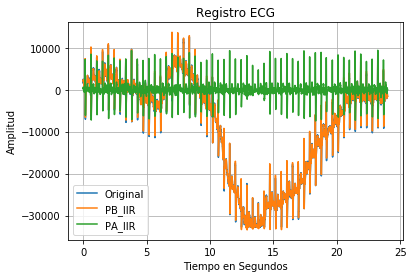

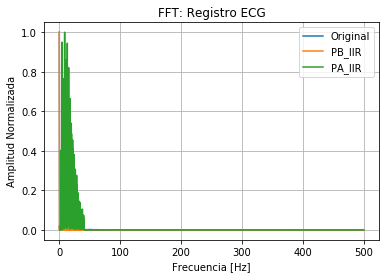

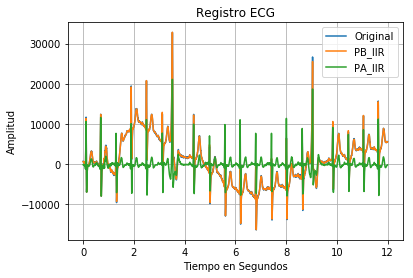

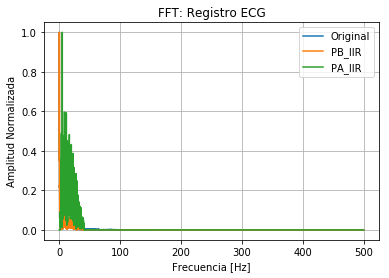

In [46]:
data = np.load('PB_IIR_ELIPTIC.npz')
h_pb_iir = data['ba']
b_pb_iir = h_pb_iir[0]
a_pb_iir = h_pb_iir[1]
data = np.load('PA_IIR_BESSEL.npz')
h_pa_iir = data['ba']
b_pa_iir = h_pa_iir[0]
a_pa_iir = h_pa_iir[1]

for i in range(3):
    ecg_In = int(zonas_sin_interf[i][0])
    ecg_Fin = int(zonas_sin_interf[i][1]) #len(ecg_lead)
    N = len(ecg_lead[ecg_In:ecg_Fin])
    tt = np.linspace(0, (N-1)*ts, N).flatten()

    yPBIIR = sig.filtfilt(b_pb_iir,a_pb_iir,ecg_lead.flatten())

    yPAIIR = sig.filtfilt(b_pa_iir,a_pa_iir,yPBIIR.flatten())

    plt.figure(i + 1)
    plt.plot(tt, ecg_lead[ecg_In:ecg_Fin],label="Original")
    plt.plot(tt, yPBIIR[ecg_In:ecg_Fin], label="PB_IIR")
    plt.plot(tt, yPAIIR[ecg_In:ecg_Fin], label="PA_IIR")
    plt.title('Registro ECG')
    plt.xlabel('Tiempo en Segundos')
    plt.ylabel('Amplitud')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

    ff = np.linspace(0.0, fs/2, N/2).flatten()

    spectrum = np.abs(sc.fft(ecg_lead[ecg_In:ecg_Fin], axis=0))
    spectrum = (1/max(spectrum))*spectrum
    halfSpectrum = spectrum[:N//2] 

    spectrumYPBIIR = np.abs(sc.fft(yPBIIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPBIIR = (1/max(spectrumYPBIIR))*spectrumYPBIIR
    halfSpectrumYPBIIR = spectrumYPBIIR[:N//2] 

    spectrumYPAIIR = np.abs(sc.fft(yPAIIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPAIIR = (1/max(spectrumYPAIIR))*spectrumYPAIIR
    halfSpectrumYPAIIR = spectrumYPAIIR[:N//2] 

    plt.figure(i + 4)

    plt.plot(ff, halfSpectrum, label="Original")
    plt.plot(ff, halfSpectrumYPBIIR, label="PB_IIR")
    plt.plot(ff, halfSpectrumYPAIIR, label="PA_IIR")

    plt.title('FFT: Registro ECG')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud Normalizada')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()
    
for i in range(2):
    ecg_In = int(zonas_con_interf_baja_frec[i][0])
    ecg_Fin = int(zonas_con_interf_baja_frec[i][1]) #len(ecg_lead)
    N = len(ecg_lead[ecg_In:ecg_Fin])
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    yPBIIR = sig.filtfilt(b_pb_iir,a_pb_iir,ecg_lead.flatten())

    yPAIIR = sig.filtfilt(b_pa_iir,a_pa_iir,yPBIIR.flatten())

    plt.figure(i + 7)
    plt.plot(tt, ecg_lead[ecg_In:ecg_Fin],label="Original")
    plt.plot(tt, yPBIIR[ecg_In:ecg_Fin], label="PB_IIR")
    plt.plot(tt, yPAIIR[ecg_In:ecg_Fin], label="PA_IIR")
    plt.title('Registro ECG')
    plt.xlabel('Tiempo en Segundos')
    plt.ylabel('Amplitud')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

    ff = np.linspace(0.0, fs/2, N/2).flatten()

    spectrum = np.abs(sc.fft(ecg_lead[ecg_In:ecg_Fin], axis=0))
    spectrum = (1/max(spectrum))*spectrum
    halfSpectrum = spectrum[:N//2] 

    spectrumYPBIIR = np.abs(sc.fft(yPBIIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPBIIR = (1/max(spectrumYPBIIR))*spectrumYPBIIR
    halfSpectrumYPBIIR = spectrumYPBIIR[:N//2] 

    spectrumYPAIIR = np.abs(sc.fft(yPAIIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPAIIR = (1/max(spectrumYPAIIR))*spectrumYPAIIR
    halfSpectrumYPAIIR = spectrumYPAIIR[:N//2] 

    plt.figure(i + 9)

    plt.plot(ff, halfSpectrum, label="Original")
    plt.plot(ff, halfSpectrumYPBIIR, label="PB_IIR")
    plt.plot(ff, halfSpectrumYPAIIR, label="PA_IIR")

    plt.title('FFT: Registro ECG')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud Normalizada')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


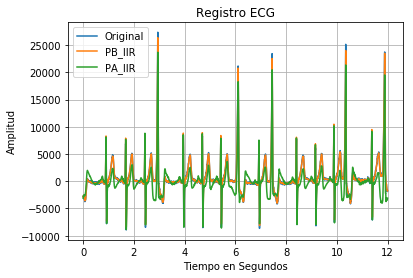

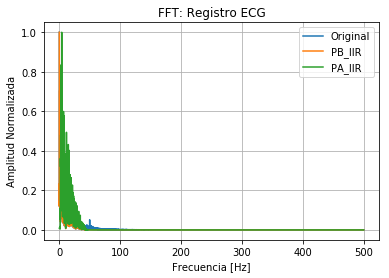

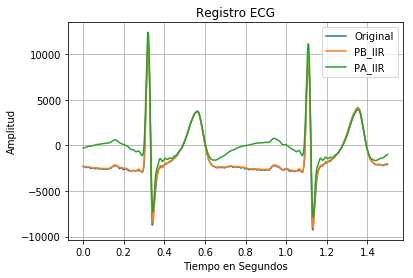

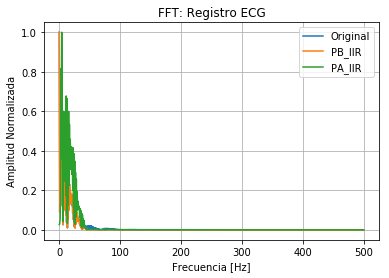

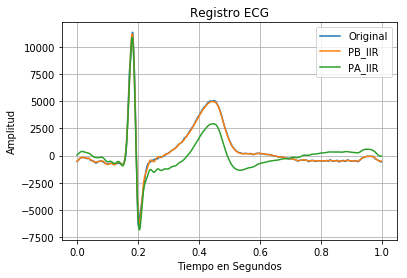

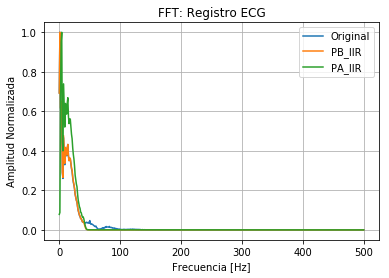

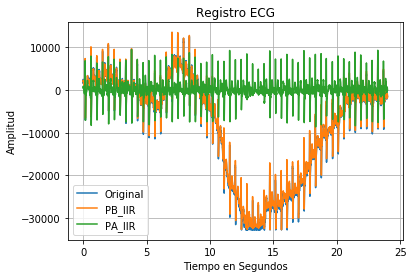

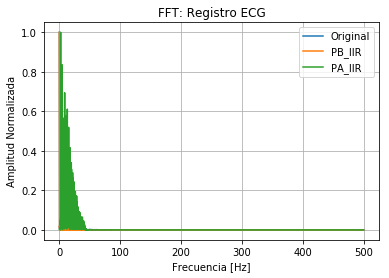

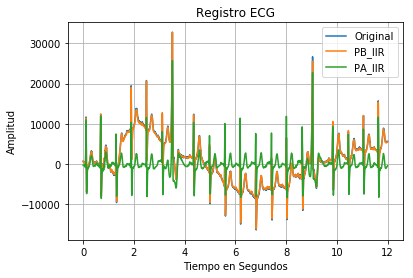

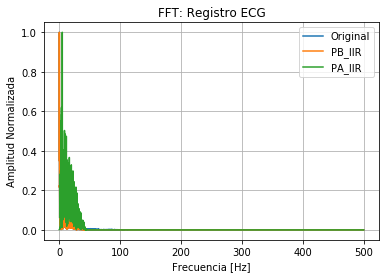

In [47]:
data = np.load('PB_IIR_CHEVYCHEV_1.npz')
h_pb_iir = data['ba']
b_pb_iir = h_pb_iir[0]
a_pb_iir = h_pb_iir[1]
data = np.load('PA_IIR_BUTTERWORTH.npz')
h_pa_iir = data['ba']
b_pa_iir = h_pa_iir[0]
a_pa_iir = h_pa_iir[1]

for i in range(3):
    ecg_In = int(zonas_sin_interf[i][0])
    ecg_Fin = int(zonas_sin_interf[i][1]) #len(ecg_lead)
    N = len(ecg_lead[ecg_In:ecg_Fin])
    tt = np.linspace(0, (N-1)*ts, N).flatten()

    yPBIIR = sig.filtfilt(b_pb_iir,a_pb_iir,ecg_lead.flatten())

    yPAIIR = sig.filtfilt(b_pa_iir,a_pa_iir,yPBIIR.flatten())

    plt.figure(i + 1)
    plt.plot(tt, ecg_lead[ecg_In:ecg_Fin],label="Original")
    plt.plot(tt, yPBIIR[ecg_In:ecg_Fin], label="PB_IIR")
    plt.plot(tt, yPAIIR[ecg_In:ecg_Fin], label="PA_IIR")
    plt.title('Registro ECG')
    plt.xlabel('Tiempo en Segundos')
    plt.ylabel('Amplitud')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

    ff = np.linspace(0.0, fs/2, N/2).flatten()

    spectrum = np.abs(sc.fft(ecg_lead[ecg_In:ecg_Fin], axis=0))
    spectrum = (1/max(spectrum))*spectrum
    halfSpectrum = spectrum[:N//2] 

    spectrumYPBIIR = np.abs(sc.fft(yPBIIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPBIIR = (1/max(spectrumYPBIIR))*spectrumYPBIIR
    halfSpectrumYPBIIR = spectrumYPBIIR[:N//2] 

    spectrumYPAIIR = np.abs(sc.fft(yPAIIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPAIIR = (1/max(spectrumYPAIIR))*spectrumYPAIIR
    halfSpectrumYPAIIR = spectrumYPAIIR[:N//2] 

    plt.figure(i + 4)

    plt.plot(ff, halfSpectrum, label="Original")
    plt.plot(ff, halfSpectrumYPBIIR, label="PB_IIR")
    plt.plot(ff, halfSpectrumYPAIIR, label="PA_IIR")

    plt.title('FFT: Registro ECG')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud Normalizada')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()
    
for i in range(2):
    ecg_In = int(zonas_con_interf_baja_frec[i][0])
    ecg_Fin = int(zonas_con_interf_baja_frec[i][1]) #len(ecg_lead)
    N = len(ecg_lead[ecg_In:ecg_Fin])
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    yPBIIR = sig.filtfilt(b_pb_iir,a_pb_iir,ecg_lead.flatten())

    yPAIIR = sig.filtfilt(b_pa_iir,a_pa_iir,yPBIIR.flatten())

    plt.figure(i + 7)
    plt.plot(tt, ecg_lead[ecg_In:ecg_Fin],label="Original")
    plt.plot(tt, yPBIIR[ecg_In:ecg_Fin], label="PB_IIR")
    plt.plot(tt, yPAIIR[ecg_In:ecg_Fin], label="PA_IIR")
    plt.title('Registro ECG')
    plt.xlabel('Tiempo en Segundos')
    plt.ylabel('Amplitud')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

    ff = np.linspace(0.0, fs/2, N/2).flatten()

    spectrum = np.abs(sc.fft(ecg_lead[ecg_In:ecg_Fin], axis=0))
    spectrum = (1/max(spectrum))*spectrum
    halfSpectrum = spectrum[:N//2] 

    spectrumYPBIIR = np.abs(sc.fft(yPBIIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPBIIR = (1/max(spectrumYPBIIR))*spectrumYPBIIR
    halfSpectrumYPBIIR = spectrumYPBIIR[:N//2] 

    spectrumYPAIIR = np.abs(sc.fft(yPAIIR[ecg_In:ecg_Fin], axis=0))
    spectrumYPAIIR = (1/max(spectrumYPAIIR))*spectrumYPAIIR
    halfSpectrumYPAIIR = spectrumYPAIIR[:N//2] 

    plt.figure(i + 9)

    plt.plot(ff, halfSpectrum, label="Original")
    plt.plot(ff, halfSpectrumYPBIIR, label="PB_IIR")
    plt.plot(ff, halfSpectrumYPAIIR, label="PA_IIR")

    plt.title('FFT: Registro ECG')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud Normalizada')
    plt.grid(which='both', axis='both')
    axes_hdl = plt.gca()
    axes_hdl.legend()

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En primer lugar, vemos que en todos los casos, tanto filtros FIR como IIR, logran eliminar la componente de continua y el ruido asociado a la red de alimentacion(entorno a los 50Hz). En segundo lugar, como era de esperar, los filtros IIR generan una mayor distorsion en la señal filtrada, pero tienen ordenes infimos en comparacion con los fir(de 1 o 2 ordenes de magnitud menos). Dentro de los dos casos de filtros FIR, no se detectan grandes diferencias a simple vista.
</div>